In [1]:
import os
import numpy as np

In [2]:
import csv
import numpy as np
import pandas as pd
import plotly.offline as plt
import plotly.graph_objs as go
import matplotlib.pyplot as mtp

Loading Data

In [3]:
data = pd.read_csv(r"Data_Points.csv")
print(data)

      Limitied_CPU  Limited_Mem  Auto Scalabilty  Multi Host  Rolling Update  \
0                6            4                5           0               2   
1                6            4                5           0               2   
2                6            4                5           0               3   
3                6            4                5           0               3   
4                6            4                5           0               1   
...            ...          ...              ...         ...             ...   
5035             0            2                1           3               6   
5036             0            2                1           3               5   
5037             0            2                1           3               5   
5038             0            2                1           3               4   
5039             0            2                1           3               4   

      Load Balancing  Delay Requirement

In [4]:
x= data.iloc[:, 0:7].values  
y= data.iloc[:, 7:8].values  
print(x.shape)
print(y.shape)
print(x)
print(y)

(5040, 7)
(5040, 1)
[[6 4 5 ... 2 1 3]
 [6 4 5 ... 2 3 1]
 [6 4 5 ... 3 1 2]
 ...
 [0 2 1 ... 5 6 4]
 [0 2 1 ... 4 5 6]
 [0 2 1 ... 4 6 5]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


Splitting Train and Test data

In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [6]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [7]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model= classifier.fit(x_train, y_train)  

/tmp/ipykernel_30586/4158738347.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [8]:
y_pred= classifier.predict(x_test)  
temp1 = classifier.predict_proba(x_test)   
print(y_pred)
print(temp1[:,1])
print(np.unique(temp1[:,1]))

[1 0 1 ... 1 0 1]
[0.8 0.  1.  ... 1.  0.  0.8]
[0.  0.2 0.4 0.6 0.8 1. ]


Acc

In [9]:
classifier.score(x_test, y_test)

0.9650793650793651

Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv= classifier
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0.89583333 0.95238095 0.95535714 0.96230159 0.91269841]
cv_scores mean:0.9357142857142857


/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Creating the Confusion matrix 

In [11]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm) 

[[722  23]
 [ 21 494]]


Plot cm


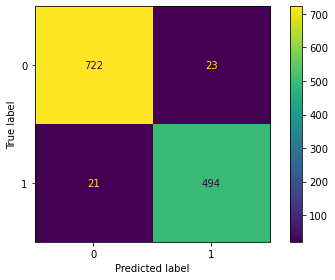

In [12]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)
plt.tight_layout()
plt.savefig('KNN_CM.eps', format='eps')

Precision & Recall score

In [13]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# Avg_prec--> for all instances
average_precision = average_precision_score(y_test, temp1[:,1])

print('Average precision score: {0:0.2f}'.format(average_precision))

# precision for instance with some probability --> default is .5
precision_var = precision_score(y_test, y_pred, average="binary")
print("Precision score:",precision_var)

recall_var = recall_score(y_test, y_pred, average="binary")
print("Recall score:",recall_var)

Average precision score: 0.99
Precision score: 0.9555125725338491
Recall score: 0.9592233009708738


Precision-Recall Curve

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


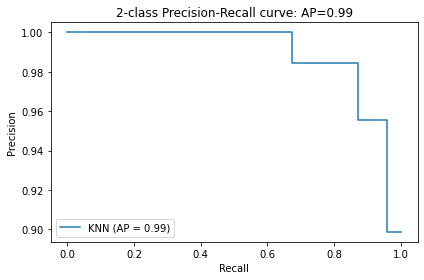

In [14]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, x_test, y_test, name="KNN")
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

plt.tight_layout()
plt.savefig('KNN_P_P-R.eps', format='eps')


In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9573643410852712

ROC Curve

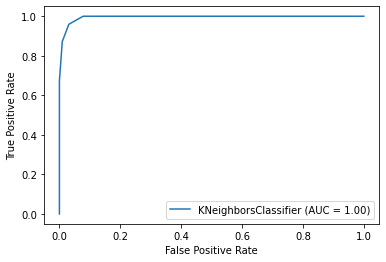

In [16]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_test, y_test)

Predict

In [17]:
predicted= classifier.predict([[2,1,3,4,5,6,0]])
print(predicted)

[0]
